In [1]:
import pandas as pd
import numpy as np
from surprise import Dataset

In [2]:
df_title= pd.read_csv('Movie_Id_Titles')
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [3]:
movielens = Dataset.load_builtin('ml-100k')
movielens = pd.DataFrame(movielens.raw_ratings, columns = ['user_id', 'item_id', 'rating', 'timestamps'])
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     100000 non-null  object 
 1   item_id     100000 non-null  object 
 2   rating      100000 non-null  float64
 3   timestamps  100000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


In [4]:
movielens[['user_id', 'item_id', 'rating']] = movielens[['user_id', 'item_id', 'rating']].astype('int64')
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     100000 non-null  int64 
 1   item_id     100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   timestamps  100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [5]:
movielens = pd.merge(movielens, df_title, on = 'item_id')

In [6]:
movielens.sort_values(by= 'item_id')

,user_id,item_id,rating,timestamps,title
3732,805,1,4,881695527,Toy Story (1995)
3759,124,1,3,890287733,Toy Story (1995)
3760,882,1,5,879864558,Toy Story (1995)
3761,779,1,4,875501555,Toy Story (1995)
3762,542,1,4,886532534,Toy Story (1995)
...,...,...,...,...,...
99958,863,1678,1,889289570,Mat' i syn (1997)
99938,863,1679,3,889289491,B. Monkey (1998)
99965,863,1680,2,889289570,Sliding Doors (1998)
99984,896,1681,3,887160722,You So Crazy (1994)


In [7]:
movielens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     100000 non-null  int64 
 1   item_id     100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   timestamps  100000 non-null  object
 4   title       100000 non-null  object
dtypes: int64(3), object(2)
memory usage: 4.6+ MB


In [8]:
moviematrix = movielens.pivot_table(index = 'item_id', columns = 'user_id', values = 'rating')

In [9]:
moviematrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#moviematrix[290]

In [11]:
cor = moviematrix.corr(method = 'pearson')

In [12]:
#cor

In [13]:
top30_users = cor[290].sort_values(ascending = False).head(31)
top30_users.drop(290, inplace = True)
top30_users

user_id
451    1.000000
724    1.000000
651    1.000000
131    1.000000
863    1.000000
252    1.000000
520    1.000000
578    1.000000
362    1.000000
750    0.944911
209    0.942809
489    0.927173
462    0.912871
797    0.912871
799    0.904534
814    0.870388
444    0.866025
482    0.866025
134    0.866025
423    0.852803
742    0.840152
3      0.818182
310    0.788342
441    0.787296
590    0.759257
598    0.755929
212    0.752549
367    0.750000
104    0.748798
359    0.745957
Name: 290, dtype: float64

In [14]:
neighbors = moviematrix[top30_users.index.tolist()]
neighbors.head()

user_id,451,724,651,131,863,252,520,578,362,750,...,742,3,310,441,590,598,212,367,104,359
item_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [15]:
neighbors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1 to 1682
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   451     98 non-null     float64
 1   724     85 non-null     float64
 2   651     21 non-null     float64
 3   131     30 non-null     float64
 4   863     107 non-null    float64
 5   252     21 non-null     float64
 6   520     23 non-null     float64
 7   578     24 non-null     float64
 8   362     25 non-null     float64
 9   750     33 non-null     float64
 10  209     33 non-null     float64
 11  489     109 non-null    float64
 12  462     33 non-null     float64
 13  797     26 non-null     float64
 14  799     24 non-null     float64
 15  814     35 non-null     float64
 16  444     24 non-null     float64
 17  482     26 non-null     float64
 18  134     25 non-null     float64
 19  423     64 non-null     float64
 20  742     26 non-null     float64
 21  3       54 non-null     float64
 22  

In [16]:
len(neighbors)

1682

# Lets figure out how many movies user ID 451 and 290 have in common (movies that they both rated) since it has a correlation of 1

In [17]:
a = movielens[movielens['user_id']==451].sort_values(by = 'item_id', ascending = True)

In [18]:
b = movielens[movielens['user_id']==290].sort_values(by = 'item_id', ascending = True)

In [111]:
a1 = a['item_id'].tolist()
b1 = b['item_id'].tolist()
#b1

In [20]:
intersection = set(b1).intersection(a1)
#intersection

## It turns out they both rated only 3 movies, which are movie_id 243, 323, 683

In [21]:
print(a[a['item_id'] == 243][['rating','item_id']],a[a['item_id'] == 323][['rating','item_id']], a[a['item_id'] == 683][['rating','item_id']])

       rating  item_id
77597       4      243        rating  item_id
23183       4      323        rating  item_id
71649       1      683


In [22]:
print(b[b['item_id'] == 243][['rating','item_id']],b[b['item_id'] == 323][['rating','item_id']], b[b['item_id'] == 683][['rating','item_id']])

       rating  item_id
77580       3      243        rating  item_id
23268       3      323        rating  item_id
71648       2      683


## If you manually calculate the pearson correlation, then you will get 1 as a result

In [23]:
import math

pearson_corr_nominator = (3-8/3)*(4-3)+(3-8/3)*(4-3)+(2-8/3)*(1-3)
sum_square_x = (3-8/3)**2 + (3-8/3)**2 + (2-8/3)**2
sum_square_y = (4-3)**2 + (4-3)**2 + (1-3)**2

sqrt = math.sqrt(sum_square_x*sum_square_y)

cor = pearson_corr_nominator/sqrt
cor

1.0

## we got a correlation of 1 because the sample size was small. So, lets work on that

In [394]:
movielens.groupby('item_id')['rating'].count().sort_values(ascending = False).head()

item_id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

In [436]:
movie_rating_num = movielens.groupby('item_id')['rating'].count().sort_values(ascending = False)

In [438]:
# Step 1: select movies that have over 50 ratings

items_over_50_rating_df = movielens.iloc[movie_rating_num[movie_rating_num>50].index.tolist()]
items_over_50_rating_df

,user_id,item_id,rating,timestamps,title
50,624,242,4,891961040,Kolya (1996)
258,74,302,4,888333219,L.A. Confidential (1997)
100,724,242,1,883758268,Kolya (1996)
181,413,302,2,879968794,L.A. Confidential (1997)
294,389,302,5,879915633,L.A. Confidential (1997)
...,...,...,...,...,...
342,934,302,4,891188367,L.A. Confidential (1997)
712,58,474,4,884305087,Dr. Strangelove or: How I Learned to Stop Worr...
749,567,474,5,882426135,Dr. Strangelove or: How I Learned to Stop Worr...
542,546,346,5,885139634,Jackie Brown (1997)


In [426]:
# Step 2: Create a pivot table
            # 2.1 select users that have rated same items as user 290
            # 2.2 find the list of all the items that user 290 rated
            # 2.3 find the list of users that rated same items as 290
            # 2.4 select the size of that list

In [427]:
items_over_50_rating_df

,user_id,item_id,rating,timestamps,title
50,624,242,4,891961040,Kolya (1996)
258,74,302,4,888333219,L.A. Confidential (1997)
100,724,242,1,883758268,Kolya (1996)
181,413,302,2,879968794,L.A. Confidential (1997)
294,389,302,5,879915633,L.A. Confidential (1997)
...,...,...,...,...,...
342,934,302,4,891188367,L.A. Confidential (1997)
712,58,474,4,884305087,Dr. Strangelove or: How I Learned to Stop Worr...
749,567,474,5,882426135,Dr. Strangelove or: How I Learned to Stop Worr...
542,546,346,5,885139634,Jackie Brown (1997)


In [430]:
# Creating Pivot Table
items_over_50_rating_pivot = items_over_50_rating_df.pivot_table(index = 'item_id', 
                                                                 columns = 'user_id', 
                                                                 values = 'rating')
items_over_50_rating_pivot

user_id,1,2,3,6,7,9,10,11,13,14,...,915,916,919,920,922,931,934,937,940,943
item_id,,,,,,,,,,,,,,,,,,,,,
51,4.0,NaN,NaN,NaN,2.0,NaN,NaN,4.0,3.0,NaN,...,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0
242,5.0,5.0,NaN,4.0,NaN,4.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,5.0,2.0,4.0,NaN,NaN,4.0,NaN,5.0,5.0,...,4.0,NaN,4.0,4.0,NaN,4.0,4.0,NaN,NaN,NaN
346,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
474,NaN,NaN,NaN,5.0,5.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [124]:
user290_top100_correlation = items_over_50_rating.corr()[290].sort_values(ascending = False)[:100]
user_id = user290_top100_correlation.index.tolist()
n_ratings = items_over_50_rating[user_id] #since we are interested in the users with high corr with user290
n_ratings[290].isnull().value_counts() # user_id 290 has rated only 112 movies, we need to drop 290 from that df

True     481
False    112
Name: 290, dtype: int64

In [125]:
# 2.1 list of all the items that user 290 rated
n_ratings[290]
itemids = n_ratings[290].index.tolist()
rated_item_by_290 = []
for ids in itemids:
    value = n_ratings[290].isnull()[ids]
    if value == False:
        rated_item_by_290.append(ids)
    
   # value = n_ratings[290][ids]
    #if value != np.NaN:
       # rated_item_290.append(value)
        
len(rated_item_by_290)

112

In [294]:
# 2.2 list of users that rated same items as 290


#user_id --> [724,451,863,651,2,675,290...]
#rated_item_by_290 --> [99,118,205,211,174,196 ....]
#n_ratings
#n_ratings[724].index.tolist() = [51,259,101,182,295 ...]

common_290_users = []
for ids in user_id:
    col = n_ratings[ids]
    col_values= []
    for item in rated_item_by_290:
        value = col.isnull()[item]
        if value == False:
            col_values.append(item)
    common_290_users.append(col_values)

#pd.Series(common_290_users[0], index = rated_item_by_290)
common_290_users[:5] # length of 100 meaning 100 columns, so the first list belongs to user 724, second is, 451 third is 863 and so on...


[[323, 271, 683], [323, 243, 683], [271, 683], [515, 683], [274, 50]]

In [335]:
n_ratings.index

Int64Index([  51,  259,  101,  182,  295,  287,  289,    2,  301,  122,
            ...
            1066,  878,  467,  769,  490,  343,  713,  750,  543,  615],
           dtype='int64', name='item_id', length=593)

In [374]:
# select the size of that list


e= [] #index of all users that have rated at least 10 items that the user 290 rated as well
for i in range(100):
    if len(set(rated_item_by_290).intersection(common_290_users[i])) >10: #  
        e.append(i)

common_userid_over10 = [] # this is the actual user_id
for i in e:
    common_userid_over10.append(user_id[i])
common_userid_over10


35

In [382]:
filtered = n_ratings[common_userid_over10]
filtered.iloc[51].isnull().value_counts()

True     32
False     3
Name: 90, dtype: int64

In [372]:
# Testing how many items user 290 and 396, 761, 703 have in common
index_items_761 = n_ratings[703].index.tolist()

com = []
for i in rated_item_by_290:
    if i in index_items_761:
        com.append(i)
all_in = n_ratings[703][com]

all_in.isnull().value_counts()



True     101
False     11
Name: 703, dtype: int64

In [350]:
rated_item_by_290

[99,
 118,
 205,
 211,
 174,
 196,
 97,
 235,
 136,
 239,
 98,
 71,
 476,
 133,
 229,
 484,
 183,
 274,
 144,
 181,
 180,
 472,
 162,
 323,
 436,
 89,
 216,
 176,
 404,
 135,
 210,
 125,
 15,
 204,
 515,
 230,
 434,
 403,
 685,
 629,
 227,
 228,
 473,
 151,
 432,
 43,
 88,
 95,
 271,
 69,
 419,
 483,
 54,
 199,
 158,
 474,
 117,
 527,
 191,
 234,
 429,
 218,
 49,
 450,
 243,
 193,
 66,
 82,
 318,
 405,
 265,
 1013,
 683,
 357,
 132,
 91,
 550,
 164,
 832,
 202,
 449,
 22,
 826,
 64,
 153,
 50,
 520,
 402,
 222,
 418,
 102,
 651,
 21,
 385,
 161,
 498,
 393,
 121,
 168,
 435,
 208,
 109,
 172,
 596,
 141,
 62,
 496,
 742,
 167,
 755,
 28,
 143]

In [248]:
#set(n_ratings[290].index.tolist()).intersection(common_userid_over10)


c = movielens[movielens['user_id']== 703][['item_id', 'user_id']]
j = movielens[movielens['user_id']== 290][['item_id', 'user_id']]



In [249]:
j.merge(c, on ='item_id')

,item_id,user_id_x,user_id_y
0,257,290,703
1,222,290,703
2,118,290,703
3,1,290,703
4,181,290,703
5,15,290,703
6,117,290,703
7,323,290,703
8,235,290,703
9,1047,290,703


In [154]:
n_ratings[746][196]

4.0

In [114]:
rating_290 = items_over_50_rating[290]
#rating_290

In [61]:
d = [] # list of all the items for each user, contains many list from index 0-942
for Id in user_id: # user_ids 
    c = n_ratings[Id].tolist() # list of all movies(item_ids) that each user rated
    d.append(c)

e= [] # list of users who rated the same 40 items as user 290 
for i in :
    if len(set(rating_290).intersection(d[i])) >4: #  
        e.append(i+1) # since user id starts at 1

In [75]:
len(d[1])

593

In [ ]:
len(d)

In [ ]:
n

## Defining a function that users that have rated at least 20 items as the user id 290


In [ ]:
moviematrix.index

In [ ]:
moviematrix.head(3)

In [ ]:
moviematrix.info()

In [ ]:
#moviematrix[290]

In [ ]:
#c = moviematrix[moviematrix['user_id']==290]

In [ ]:
#diff = moviematrix - m[:,np.newaxis]
#diff

In [ ]:
column_names = moviematrix.columns.tolist()

In [ ]:
d = [] # list of all users who rated a list of items, contains many list from index 0-942
for user_id in column_names: # user_ids 
    c = items_over_100_rating[movielens['user_id']== user_id]['item_id'].tolist() # list of all movies(item_ids) that each user rated
    d.append(c)

e= [] # list of users who rated the same 40 items as user 290 
for i in range(943):
    if len(set(b1).intersection(d[i])) >40: #  
        e.append(i+1) # since user id starts at 1


In [ ]:
common_users = moviematrix[e]

common_users[290] = moviematrix[290]
#common_users[290]

In [ ]:
neighbors_290= common_users.corr()[290].sort_values(ascending =False).head(31).drop(290)
neighbors_290.index

In [ ]:
weight_290 = neighbors_290.values.tolist()
weight_290

In [ ]:
neighborsmat_290= moviematrix[neighbors_290.index.tolist()]

In [ ]:
neighborsmat_290.corr().head(2)

In [ ]:
mean_290 = moviematrix[290].mean()
mean_290

In [ ]:
mean_rating_neighbors = neighborsmat_290.mean(axis =0)

In [ ]:
column_num290 = neighborsmat_290.columns.tolist()
column_num290

In [ ]:
neighborsmat_290_fillna = neighborsmat_290.fillna(0)

In [ ]:
n_index = neighborsmat_290_fillna.index.tolist()

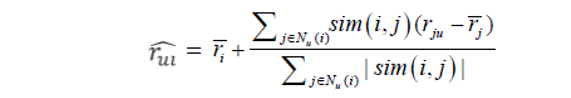


In [ ]:
neighborsmat_290_fillna.value_counts()

In [ ]:
# definin a function that selects movies(items_id) that have at least 10 ratings

def movie_ratings(df):
    count_nonzeros_list = []
    for i in range(len(df)):
        row = df.iloc[i]
        count_nonzeros = 0
        for col_name in column_num290:
            if row[col_name] != 0:
                count_nonzeros += 1
        count_nonzeros_list.append(count_nonzeros)
    l = pd.Series(count_nonzeros_list, index = n_index)
    return l

In [ ]:
movie_ratings(neighborsmat_290_fillna)

In [ ]:
# Getting movies with at least 10 ratings
rates = movie_ratings(neighborsmat_290_fillna)
m = []
for i in n_index:
    if rates[i]>10:
        m.append(i)
m

In [ ]:
rates.index

In [ ]:
# lets check the last 10 rows 
last_10row = neighborsmat_290_fillna.tail(10)
last_10row.loc[1681]

In [ ]:
for i in range(neighborsmat_290_fillna):
        row = neighborsmat.iloc[i]
        for col_name in column_num290:
            if row[col_name] != 0:
                print(row)

In [ ]:
neighborsmat_290_fillna.columns

In [ ]:
column_num290 = neighborsmat_290_fillna.columns.tolist()
len(column_num290)

In [ ]:
len(weight_290)

In [ ]:
for j in range(1682):
    row = neighborsmat_290_fillna.iloc[j]


In [ ]:

neighborsmat_290.iloc[1680]

In [ ]:
sum_weight_290 = []
for j in range(1683):
    row = neighborsmat_290_fillna.iloc[j]
    row_weight = []
    for i in column_num290:  
        if row[i] != 0:
            row_weight.append(weight_290[i])
    sum_weight_290.append(pd.Series(row_weight).sum())

In [ ]:
# the nominator of the pred equation above
def one_row_diff(df,index):
    sum_weight = []
    row = df.iloc[index]
    for i in column_num290:
        if row[i] != 0:
            s= (row[i] - mean_rating_neighbors[i])*weight_290[i]
            sum_weight.append(s)
    sum_weight_series = pd.Series(sum_weight).sum()
    return sum_weight_series

In [ ]:
weight_factor =[]
for j in range(100):
    weight_factor.append(one_row_diff(df,j))

In [ ]:
normalized_value = pd.Series(weight_factor)/pd.Series(sum_weight_3712) +4.5
normalized_value

In [ ]:
#neighborsmat_290_fillna

In [ ]:
# lets test if we got the right users, so we are going to investigate if user 1 has at least 40 items in common with user 290
# the answer is yesssss

c = movielens[movielens['user_id']== 44]['item_id'].tolist()
h = set(b1).intersection(c)
len(h)

In [ ]:
len(movielens[movielens['user_id']== 44][['item_id', 'user_id']].sort_values(by = 'item_id',ascending = True)) # rated 151 items and 74 in common with user 290

In [ ]:
intersect = set(b1).intersection(c)


In [ ]:
# lets see which ones they have in common
m = movielens[movielens['user_id']== 44][['item_id', 'user_id']].sort_values(by = 'item_id',ascending = True)

In [ ]:
#b.merge(m, on = 'item_id')


In [ ]:
#name of the user_id
#column_names
#c = movielens[movielens['user_id']== 451]['item_id'].tolist()   # list of all movies(item_ids) that user_id rated

In [ ]:
#neighbors_290_test = common_users.corr()[290].sort_values(ascending =False).head(31)
#neighbors_290_test

In [ ]:
#neighborsmat_290_fillna.iloc[0]

In [ ]:
#column_num290

In [ ]:
neighborsmat_290_fillna

In [ ]:
weight_290